# Importing libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

# Import the files containing cleaned tweets and sentiment analysis

In [2]:
def updateDF(df):  # updates dataframe - removes duplicates and resets indexes
    df = df.reset_index(drop=True)  # resetting rows
    df = df.drop_duplicates()
    return df.reset_index(drop=True)

- First read the corpus of tweets collected from the existing covid-19 vaccine ('readCorpus()'), then, read the corpus of tweets colleced using Twitter's API search endpoint ('readSearchedCorpus()'). 

These function will read all TSV files as dataframes and appends them to the respective list of dataframes. Each list of dataframes will then be merged into one dataframe, where each dataframe will correspond to the country at that timeframe containing all respective tweets.

In [3]:
df_GB_list_pre = []
df_IT_list_pre = []
df_ES_list_pre = []

df_GB_list_post = []
df_IT_list_post = []
df_ES_list_post = []

def readCorpus(corpusPath): 
    for root, dirs, files in os.walk(corpusPath):
        for name in files:
            print(os.path.join(root,name), root[root.find('/')+1:])
            country_code = root[root.find('/')+1:]
            with open(os.path.join(root,name), "r", encoding="utf-8") as f:
                print(root)
                if "Pre" == root[:3]:
                    if country_code == "GB":
                        df_GB_list_pre.append(pd.read_csv(os.path.join(root,name), sep='\t'))
                    elif country_code == "IT":
                        df_IT_list_pre.append(pd.read_csv(os.path.join(root,name), sep='\t'))
                    else:
                        df_ES_list_pre.append(pd.read_csv(os.path.join(root,name), sep='\t'))
                        
                else:
                    if country_code == "GB":
                        df_GB_list_post.append(pd.read_csv(os.path.join(root,name), sep='\t'))
                    elif country_code == "IT":
                        df_IT_list_post.append(pd.read_csv(os.path.join(root,name), sep='\t'))
                    else:
                        df_ES_list_post.append(pd.read_csv(os.path.join(root,name), sep='\t'))

In [4]:
def readSearchedCorpus(corpusPath): 
    df_list = []
    for root, dirs, files in os.walk(corpusPath):
        for name in files:
            print(os.path.join(root,name))
            with open(os.path.join(root,name), "r", encoding="utf-8") as f:
                df_list.append(pd.read_csv(os.path.join(root,name), sep='\t'))
           
    temp_searched_df = pd.concat(df_list)
    return updateDF(temp_searched_df)  # resetting rows

In [5]:
def splitSearchedCorpus(df):
    df_GB = df[df['Country']=="GB"]
    df_IT = df[df['Country']=="IT"]
    df_ES = df[df['Country']=="ES"]
    
    df_GB_list_post.append(df_GB)
    df_IT_list_post.append(df_IT)
    df_ES_list_post.append(df_ES)

In [6]:
searched_df = readSearchedCorpus("Searched_Dataset_Cleaned")
splitSearchedCorpus(searched_df)

Searched_Dataset_Cleaned/Searched_Tweets_1.7.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.6.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.4.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.5.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.1.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.2.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.3.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.8.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.9.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.10.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.11.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.13.tsv
Searched_Dataset_Cleaned/Searched_Tweets_1.12.tsv


In [7]:
readCorpus("Pre_Dataset_Cleaned")
readCorpus("Post_Dataset_Cleaned")

Pre_Dataset_Cleaned/IT/IT_Tweets_pre.tsv IT
Pre_Dataset_Cleaned/IT
Pre_Dataset_Cleaned/IT/IT_Tweets_pre_1.tsv IT
Pre_Dataset_Cleaned/IT
Pre_Dataset_Cleaned/GB/GB_Tweets_pre.tsv GB
Pre_Dataset_Cleaned/GB
Pre_Dataset_Cleaned/GB/GB_Tweets_pre_1.1.tsv GB
Pre_Dataset_Cleaned/GB
Pre_Dataset_Cleaned/ES/ES_Tweets_pre.tsv ES
Pre_Dataset_Cleaned/ES
Pre_Dataset_Cleaned/ES/ES_Tweets_pre_1.tsv ES
Pre_Dataset_Cleaned/ES
Post_Dataset_Cleaned/IT/IT_Tweets_post_2.tsv IT
Post_Dataset_Cleaned/IT
Post_Dataset_Cleaned/IT/IT_Tweets_post.tsv IT
Post_Dataset_Cleaned/IT
Post_Dataset_Cleaned/GB/GB_Tweets_post.tsv GB
Post_Dataset_Cleaned/GB
Post_Dataset_Cleaned/GB/GB_Tweets_post_2.tsv GB
Post_Dataset_Cleaned/GB
Post_Dataset_Cleaned/ES/ES_Tweets_post.tsv ES
Post_Dataset_Cleaned/ES
Post_Dataset_Cleaned/ES/ES_Tweets_post_2.tsv ES
Post_Dataset_Cleaned/ES


In [8]:
# Concatenate/Merging multiple dfs into 1 - pre dataset
df_GB_pre = pd.concat(df_GB_list_pre)
df_GB_pre = updateDF(df_GB_pre)

df_IT_pre = pd.concat(df_IT_list_pre)
df_IT_pre = updateDF(df_IT_pre)

df_ES_pre = pd.concat(df_ES_list_pre)
df_ES_pre = updateDF(df_ES_pre)

In [9]:
# Concatenate/Merging multiple dfs into 1 - post dataset
df_GB_post = pd.concat(df_GB_list_post)
df_GB_post = updateDF(df_GB_post)

df_IT_post = pd.concat(df_IT_list_post)
df_IT_post = updateDF(df_IT_post)

df_ES_post = pd.concat(df_ES_list_post)
df_ES_post = updateDF(df_ES_post)

In [10]:
df_GB_post

,Tweets,Country,Compound,Analysis
0,My vaccination gacha pulled a ⭐⭐⭐⭐⭐Pfizer 🤩,GB,0.0000,Neutral
1,Right. I'm half full of Pfizer and wholly full...,GB,0.4404,Positive
2,AZ takes longer to work than PfizerAZ starte...,GB,0.0000,Neutral
3,"I wouldn't call 60% ""highly effective"". Isn't ...",GB,0.1779,Positive
4,It seems the information being released this ...,GB,0.2023,Positive
...,...,...,...,...
36455,us arranges 277.3 million doses of covid-19 va...,NaN,0.0000,Neutral
36456,need your first #covidvaccine and live in #don...,NaN,0.0000,Neutral
36457,second-dose covid-19 jabs brought forward as i...,NaN,0.0000,Neutral
36458,inching closer and closer to that sweet sweet ...,NaN,0.5859,Positive


## Calculate Total Number of Filtered Tweets Collected

In [11]:
len_dfs = df_GB_pre.shape[0] + df_GB_post.shape[0] + df_IT_pre.shape[0] + df_IT_post.shape[0] + df_ES_pre.shape[0] + df_ES_post.shape[0]
print(f"{len_dfs} filtered tweets have been collected.")

50051 filtered tweets have been collected.


# Sentiment Analysis Evaluation

## Plotting Bar Chart and Tables

In this section, a bar chart for each country will be outputted together with a respective table outlining the actual percentages values.

In [12]:
def outputTable(df_GB_cleaned_s,df_IT_cleaned_s,df_ES_cleaned_s):
    gb_positive = round(df_GB_cleaned_s['Positive'],2)
    gb_neutral = round(df_GB_cleaned_s['Neutral'],2)
    gb_negative = round(df_GB_cleaned_s['Negative'],2)
    
    it_positive = round(df_IT_cleaned_s['Positive'],2)
    it_neutral = round(df_IT_cleaned_s['Neutral'],2)
    it_negative = round(df_IT_cleaned_s['Negative'],2)
    
    es_positive = round(df_ES_cleaned_s['Positive'],2)
    es_neutral = round(df_ES_cleaned_s['Neutral'],2)
    es_negative = round(df_ES_cleaned_s['Negative'],2)
    
    print("\t\tGreat Britain\tItaly  \tSpain")
    print(f"Positive\t{gb_positive}%\t\t{it_positive}%\t{es_positive}%")
    print(f"Neutral\t\t{gb_neutral}%\t\t{it_neutral}%\t{es_neutral}%")
    print(f"Negative\t{gb_negative}%\t\t{it_negative}%\t{es_negative}%")

In [13]:
def plotBarChart(df_GB_cleaned, df_IT_cleaned, df_ES_cleaned, title):
    X = ['Positive','Neutral','Negative']
  
    X_axis = np.arange(len(X))

    df_GB_cleaned_s = df_GB_cleaned['Analysis'].value_counts(normalize=True)*100
    df_IT_cleaned_s = df_IT_cleaned['Analysis'].value_counts(normalize=True)*100
    df_ES_cleaned_s = df_ES_cleaned['Analysis'].value_counts(normalize=True)*100

    plt.bar(X_axis - 0.2, df_GB_cleaned_s.sort_index(ascending=False) , 0.2, label = 'Great Britain', color='red')
    plt.bar(X_axis, df_IT_cleaned_s.sort_index(ascending=False), 0.2, label = 'Italy', color='green')
    plt.bar(X_axis + 0.2, df_ES_cleaned_s.sort_index(ascending=False), 0.2, label = 'Spain', color='orange')

    plt.xticks(X_axis, X)
    plt.ylim([0,50])
    plt.title("Sentiment Analysis on Covid-19 Vaccine Uptake in EU - "+title)
    plt.xlabel("Sentiment")
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

    outputTable(df_GB_cleaned_s,df_IT_cleaned_s,df_ES_cleaned_s)

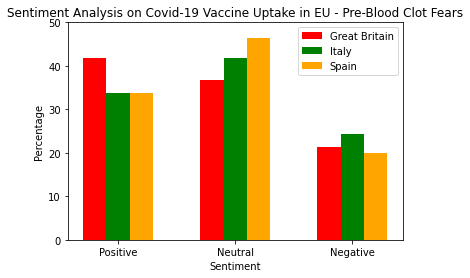

		Great Britain	Italy  	Spain
Positive	41.74%		33.77%	33.67%
Neutral		36.82%		41.82%	46.48%
Negative	21.44%		24.42%	19.85%


In [14]:
plotBarChart(df_GB_pre, df_IT_pre, df_ES_pre, "Pre-Blood Clot Fears")

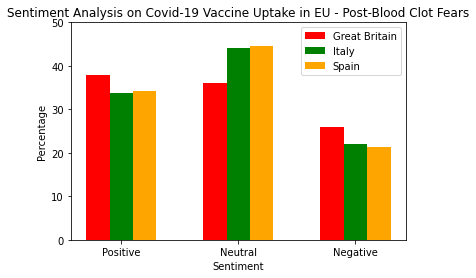

		Great Britain	Italy  	Spain
Positive	38.0%		33.83%	34.28%
Neutral		36.02%		44.14%	44.45%
Negative	25.98%		22.03%	21.27%


In [15]:
plotBarChart(df_GB_post, df_IT_post, df_ES_post, "Post-Blood Clot Fears")

## Pie Chart & Word Cloud

### Plotting a pie chart and word cloud combining every country together

In this section a pie chart together with a word cloud for the overall sentiments in the respective timeframe will be outputted. 

In [16]:
def plotPieChart(df,txt):

    sentiments = df['Analysis'].value_counts().tolist()

    my_labels = 'Positive','Neutral','Negative'

    plt.pie(sentiments,labels=my_labels,autopct='%1.2f%%')
    plt.title('Overview of Sentiment Analysis On All Countries '+txt+'-Blood Clot Fears')
    plt.axis('equal')
    plt.show()

In [17]:
def generateWordCloud(df, txt):

    df = df.dropna()
    all_words_GB = ' '.join(df['Tweets'])
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words_GB)

    plt.title("WordCloud "+txt+"-Blood Clot Fears")
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

In [18]:
def prepareDfs(df1, df2, df3, txt):

    temp_df_cleaned = df1.append(df2)
    temp_df_cleaned = updateDF(temp_df_cleaned)
    df_cleaned = temp_df_cleaned.append(df3)
    df_cleaned = updateDF(df_cleaned)
    
    plotPieChart(df_cleaned, txt)
    generateWordCloud(df_cleaned, txt)

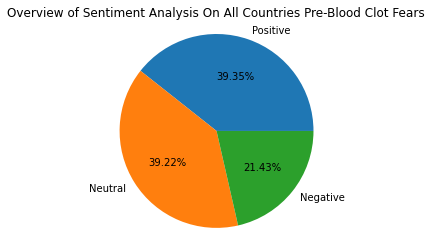

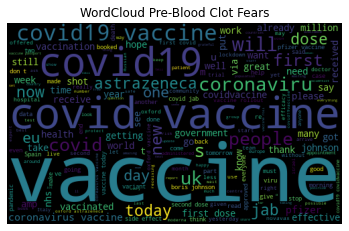

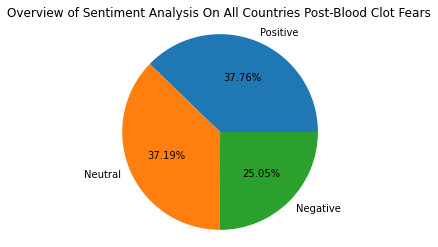

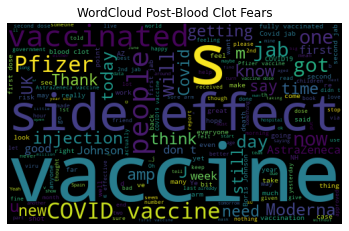

In [19]:
prepareDfs(df_GB_pre, df_IT_pre, df_ES_pre, "Pre")
prepareDfs(df_GB_post, df_IT_post, df_ES_post, "Post")

# ------------------------------------ END ------------------------------------